In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd


train = pd.read_csv('/content/gdrive/MyDrive/Case_1/UCI HAR Dataset/CSV_files/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Case_1/UCI HAR Dataset/CSV_files/test.csv')
train.head()



,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.57

In [ ]:
train.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
544,0.272677,-0.017661,-0.128059,-0.979699,-0.929319,-0.940014,-0.985231,-0.934297,-0.939896,-0.925928,-0.531183,-0.798644,0.804973,0.657593,0.804574,-0.956953,-0.999703,-0.99878,-0.996998,-0.990931,-0.958456,-0.944474,-0.434813,-0.303664,-0.524677,-0.184672,0.045155,0.11018,0.086964,-0.157183,0.079194,0.080748,0.086146,0.12558,-0.18523,0.268242,-0.206477,0.067378,-0.422955,-0.037135,...,-0.873016,0.349099,-0.826038,-0.972133,-0.926054,-0.901067,-0.898583,-0.906729,-0.968821,-0.926054,-0.994696,-0.960565,-0.242824,-0.948718,-0.319556,-0.192463,-0.563555,-0.973395,-0.972895,-0.970213,-0.974866,-0.991671,-0.973395,-0.999541,-0.975474,-0.618946,-0.968254,-0.134544,-0.256129,-0.619731,0.056245,-0.335719,-0.622993,-0.368906,-0.709631,0.294431,0.059987,3,5,STANDING


#Drop last three columns and keep 'ActivityName' column only.

In [ ]:
X_train = train.drop(['subject','Activity','ActivityName'],axis=1)
y_train = train['ActivityName']

In [ ]:
y_train.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: ActivityName, dtype: object

In [ ]:
X_test = test.drop(['subject','Activity','ActivityName'],axis=1)
y_test = test.ActivityName

#Lets model our data

#labels that are useful in plotting confusion matrix

In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

##Function to plot the confusion matrix

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Generic function to run any model specified

In [ ]:
from datetime import datetime
def perform_model(model,X_train,y_train,X_test,y_test,\
                  class_labels,cm_normalize=True,\
                  print_cm=True,cm_cmap=plt.cm.Greens):
  # used to store results at various place
  results = dict()

  # training
  train_start_time = datetime.now()
  print('training the model..')
  model.fit(X_train,y_train)
  print('Done')
  train_end_time= datetime.now()
  results['training_time'] = train_end_time -train_start_time
  print(results['training_time'])

  # predict on test data
  print('Predicting test data')
  test_start_time = datetime.now()
  y_pred = model.predict(X_test)
  test_end_time = datetime.now()
  print('Done')
  results['testing_time'] = test_end_time-test_start_time
  print(results['testing_time'])
  results['predicted']= y_pred

  # Accuracy
  print('Accuracy')
  accuracy = metrics.accuracy_score(y_true= y_test,y_pred=y_pred)
  results['accuracy']  = accuracy
  print('accuracy')

  # Confusion Matrix
  print('Confusion Matrix')
  cm = metrics.confusion_matrix(y_test,y_pred)
  results['confusion_matrix']  = cm

  if print_cm:
    print(cm)

  plt.figure(figsize=(8,8))
  plt.grid(b=False)
  plot_confusion_matrix(cm,classes=class_labels,normalize=True,\
                        title='Normalized confusion matrix',cmap=cm_cmap)
  plt.show()

  # Classification Report
  print('Classification Report')
  classification_report = metrics.classification_report(y_test,y_pred)
  results['classification_report'] = classification_report
  print(classification_report)

  results ['model'] = model

  return results

#Method to print the gridsearch Attributes

In [ ]:
def print_grid_search_attributes(model):
  print('Best Estimator')
  print(model.best_estimator_)

  print('Best parameters')
  print(model.best_params_)

  print('No of Crossvalidation sets')
  print(model.n_splits_)

  print('Best Score')
  print(model.best_score_)

#1. Logistic Regression with Grid Search

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   25.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done
0:00:29.184388
Predicting test data
Done
0:00:00.012054
Accuracy
accuracy
Confusion Matrix
[[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  15 517   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  22   1 448]]


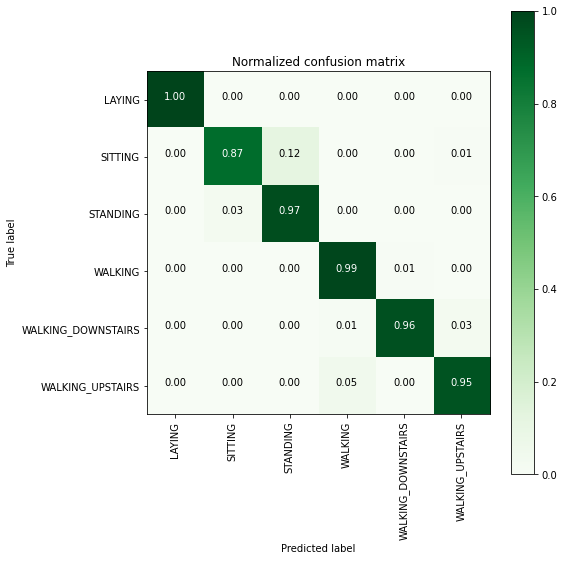

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
parameters = {'C':[0.01,0.1,1,10,20,30],'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg,param_grid=parameters,cv=3,verbose=1,n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid,X_train,y_train,X_test,y_test,class_labels=labels)

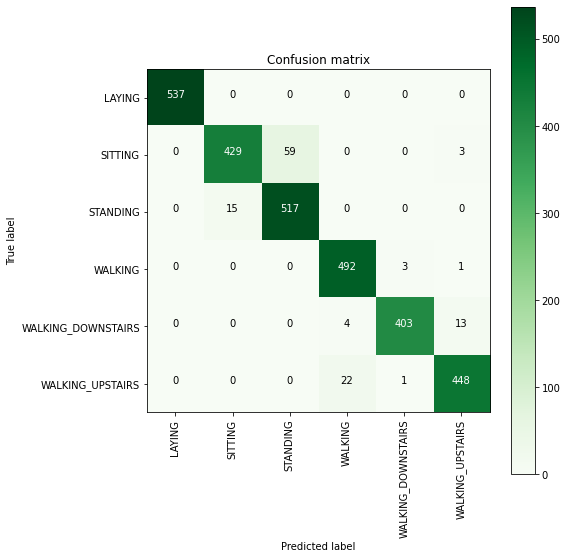

In [ ]:
plt.figure(figsize = (8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes = labels, cmap = plt.cm.Greens,)

In [ ]:

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])


Best Estimator
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best parameters
{'C': 1, 'penalty': 'l2'}
No of Crossvalidation sets
3
Best Score
0.9358015748118914


#Linear SVC with parameter tuning using Grid Search

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, 

Done
0:02:13.847309
Predicting test data
Done
0:00:00.010473
Accuracy
accuracy
Confusion Matrix
[[537   0   0   0   0   0]
 [  2 429  56   0   0   4]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


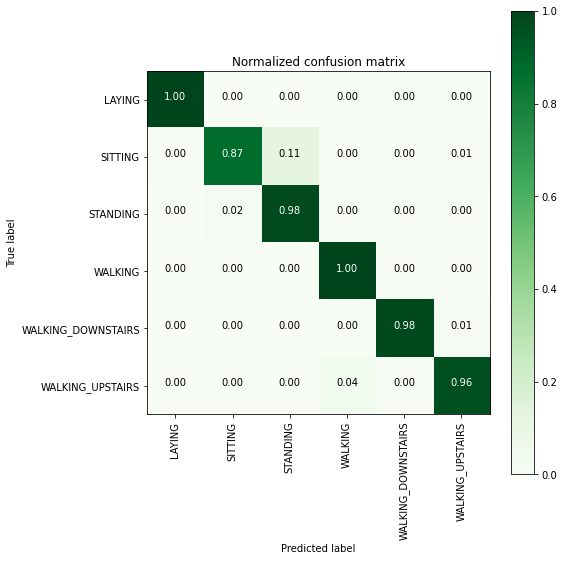

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [ ]:
from sklearn.svm import LinearSVC

parameters = {'C' : [0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol = 0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid = parameters, n_jobs = 1, verbose = 1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels = labels)

#Kernel SVM with parameter tuinning using Grid Search

training the model..
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 14.4min finished


Done
0:14:26.106942
Predicting test data
Done
0:00:03.109739
Accuracy
accuracy
Confusion Matrix
[[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


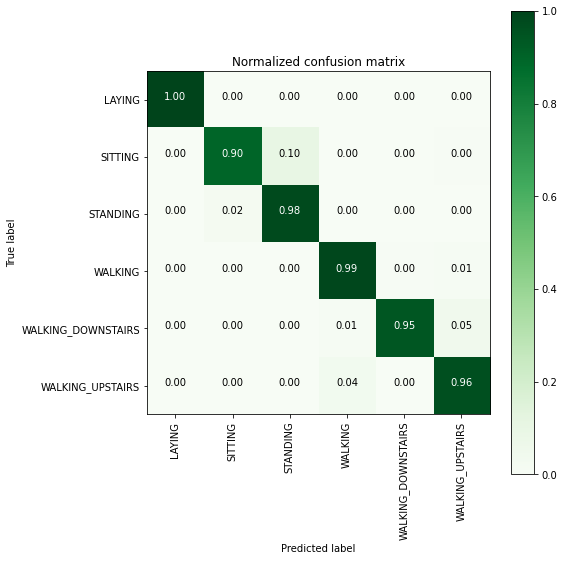

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16], 'gamma':[0.0078125, 0.125, 2]}
rvf_svm = SVC(kernel = 'rbf')
rvf_svm_grid = GridSearchCV(rvf_svm, param_grid = parameters, n_jobs = -1, verbose = 1)
rvf_svm_grid_results = perform_model(rvf_svm_grid, X_train, y_train, X_test, y_test, class_labels = labels,)

#Decision Tree with Grid Search

training the model..
Done
0:00:44.666520
Predicting test data
Done
0:00:00.005610
Accuracy
accuracy
Confusion Matrix
[[537   0   0   0   0   0]
 [  0 371 120   0   0   0]
 [  0  60 472   0   0   0]
 [  0   0   0 472  18   6]
 [  0   0   0  23 352  45]
 [  0   0   0  61  44 366]]


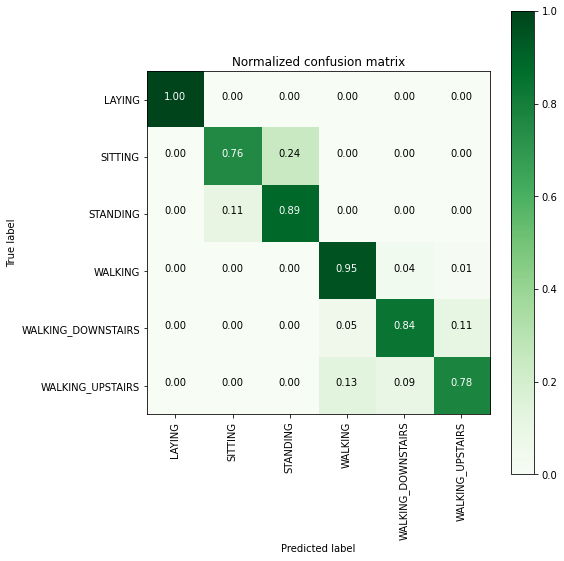

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.76      0.80       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.85      0.84      0.84       420
  WALKING_UPSTAIRS       0.88      0.78      0.82       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947

Best Estimator
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecat

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth': np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_grid = parameters, n_jobs = 1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels = labels)
print_grid_search_attributes(dt_grid_results['model'])

#Random Forest Classifier

training the model..
Done
0:25:15.361793
Predicting test data
Done
0:00:00.114011
Accuracy
accuracy
Confusion Matrix
[[537   0   0   0   0   0]
 [  0 431  60   0   0   0]
 [  0  44 488   0   0   0]
 [  0   0   0 477  11   8]
 [  0   0   0  23 355  42]
 [  0   0   0  43   6 422]]


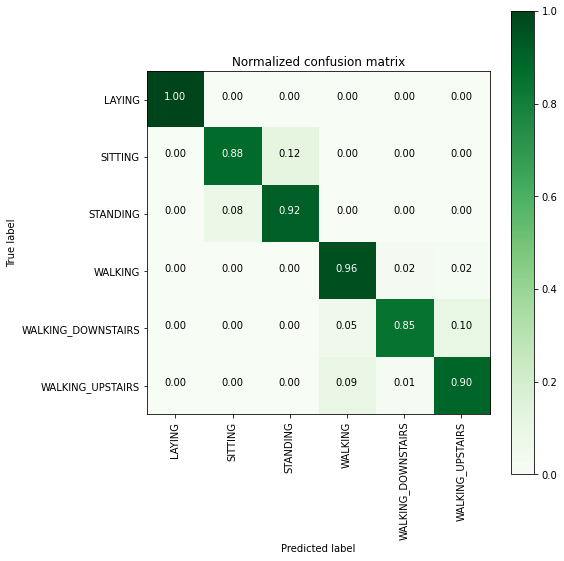

Classification Report
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.88      0.89       491
          STANDING       0.89      0.92      0.90       532
           WALKING       0.88      0.96      0.92       496
WALKING_DOWNSTAIRS       0.95      0.85      0.90       420
  WALKING_UPSTAIRS       0.89      0.90      0.90       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

Best Estimator
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
          

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth': np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid = params, n_jobs = -1)
rfc_grid_results = perform_model(rfc_grid, X_train,y_train, X_test, y_test, class_labels = labels)
print_grid_search_attributes(rfc_grid_results['model'])

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
              'n_estimators': np.arange(130, 170, 10)}

gbdt = GradientBoostingClassifier()

gbdt_grid = GridSearchCV(gbdt, param_grid = param_grid, n_jobs = -1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels = labels)

print_grid_searach_attributes(gbdt_grid_results['model'])

training the model..


In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))